In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import numpy as np

In [27]:
df = pd.read_csv("iris_final.csv")

In [28]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
#df.info()


In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Ort,Anzahl
count,33258.000000,33266.000000,33251.000000,33257.000000,33333.000000,33333.000000
mean,5.842875,3.051325,3.759283,1.198384,4.496025,149.907029
std,0.827478,0.433171,1.759673,0.762313,2.873815,86.454007
min,3.497633,1.480765,0.866959,-0.154528,0.000000,1.000000
25%,5.162826,2.743533,1.578923,0.315163,2.000000,75.000000
50%,5.815321,3.020141,4.253168,1.322284,4.000000,150.000000
75%,6.445396,3.338377,5.214180,1.844181,7.000000,225.000000
max,9.178336,4.997633,7.941772,3.018332,9.000000,299.000000


In [6]:
orte = {0:'München', 1:'Rostock', 2:'Trier', 3:'Münster', 4:'Ulm', 5:'Hamburg', 6:'Köln', 7:'Würzburg', 8:'Leipzig', 9:'Wolfsburg'}

In [7]:
df['Ort'] = df['Ort'].apply(lambda x: orte[x])

# IRIS

| **Setosa** | **Versicolor** | **Virginica** |
| --- | --- | ---|
|![title](iris_setosa.jpg) | ![title](iris_versicolor.jpg)| ![title](iris_virginica.jpg)


__Analyse der von Firma XYZ freundlicherweise zur Verfügung gestellten Daten__

## Überblick

In [8]:
df

,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Ort,Anzahl
0,Iris-setosa,4.959947,3.210710,1.673597,0.248389,Ulm,172
1,Iris-setosa,4.777595,3.131878,1.413592,0.113217,Trier,138
2,Iris-setosa,4.807163,3.475521,1.371495,0.159915,München,144
3,Iris-setosa,4.752104,3.738200,1.435881,0.234247,Rostock,210
4,Iris-setosa,5.021368,2.382476,1.257389,0.198184,Hamburg,72
...,...,...,...,...,...,...,...
33328,Iris-virginica,6.845773,3.168164,5.296417,1.704381,Trier,122
33329,Iris-virginica,6.129696,2.630707,6.176997,2.217329,Wolfsburg,291
33330,Iris-virginica,6.191558,2.812238,6.362977,2.287243,Köln,169
33331,Iris-virginica,5.275439,2.425751,6.293001,1.389706,Rostock,110


## Fehlende Messwerte

In [9]:
na_sum = df.isna().sum()
na_perc = df.isna().mean() * 100
pd.concat([na_sum, na_perc], axis=1)

,0,1
Species,0,0.000000
SepalLengthCm,75,0.225002
SepalWidthCm,67,0.201002
PetalLengthCm,82,0.246002
PetalWidthCm,76,0.228002
Ort,0,0.000000
Anzahl,0,0.000000


### Können fehlende Werte durch Median ersetzt werden?

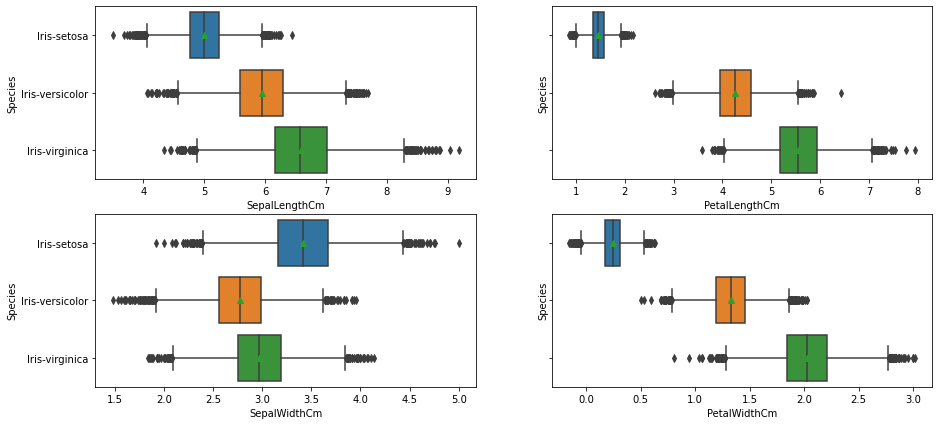

In [10]:
#plt.figure(figsize=(20,14))sharex=True, figsize=(10,5)
f, axes = plt.subplots(2, 2, sharey=True, figsize=(15,7))
#plt.subplots_adjust(hspace = 1)
#plt.subplots_adjust(space = 1)
sns.boxplot( y=df["Species"], x=df["SepalLengthCm"], showmeans=True, ax=axes[0,0] );
sns.boxplot( y=df["Species"], x=df["SepalWidthCm"], showmeans=True, ax=axes[1,0] );
sns.boxplot( y=df["Species"], x=df["PetalLengthCm"], showmeans=True, ax=axes[0,1] );
sns.boxplot( y=df["Species"], x=df["PetalWidthCm"], showmeans=True, ax=axes[1,1] );
plt.show()

* Daten sind in etwa symetrisch verteilt
* Mittelwerte und Mediane liegen nah beieinander
* keine Etremwerte oder sonstigen Artefakte erkennbar

__Ergebnis:__ wir können fehlende Messwerte mit Medianen ersetzen ohne die Daten zu verfälschen__

### Medianwerte zum Auffüllen fehlender Werte

In [12]:
df.groupby(['Species']).median()[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,4.999102,3.419324,1.462429,0.242058
Iris-versicolor,5.947999,2.769669,4.265327,1.325246
Iris-virginica,6.574439,2.967676,5.553749,2.025754


In [13]:
df_nan = df[df.isna().any(axis=1)] #store rows with any nan for check
df_nan

,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Ort,Anzahl
32,Iris-setosa,5.089200,3.885841,1.443582,NaN,Münster,64
44,Iris-setosa,NaN,3.647520,1.555325,0.186717,Leipzig,245
66,Iris-setosa,4.992508,3.437886,NaN,0.232738,Ulm,158
161,Iris-setosa,4.821030,NaN,1.203912,0.169071,Wolfsburg,296
277,Iris-setosa,5.586751,3.347874,NaN,0.225583,München,105
...,...,...,...,...,...,...,...
32233,Iris-virginica,NaN,3.199363,4.745835,2.403746,Trier,6
32616,Iris-virginica,6.300287,2.736701,4.613381,NaN,Köln,237
32633,Iris-virginica,6.111489,NaN,5.253105,1.773639,Hamburg,232
32736,Iris-virginica,NaN,2.634692,6.121709,1.698167,Trier,57


In [14]:
df['SepalLengthCm'] = df['SepalLengthCm'].fillna(df.groupby('Species')['SepalLengthCm'].transform('median'))
df['SepalWidthCm'] = df['SepalWidthCm'].fillna(df.groupby('Species')['SepalWidthCm'].transform('median'))
df['PetalLengthCm'] = df['PetalLengthCm'].fillna(df.groupby('Species')['PetalLengthCm'].transform('median'))
df['PetalWidthCm'] = df['PetalWidthCm'].fillna(df.groupby('Species')['PetalWidthCm'].transform('median'))

In [15]:
# check if nans are gone
df_nan = df[df.isna().any(axis=1)] #store rows with any nan for check
df_nan

,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Ort,Anzahl


## Wie kann man die Iris-Sorten unterscheiden?

### Anhand der Kelchblätter?

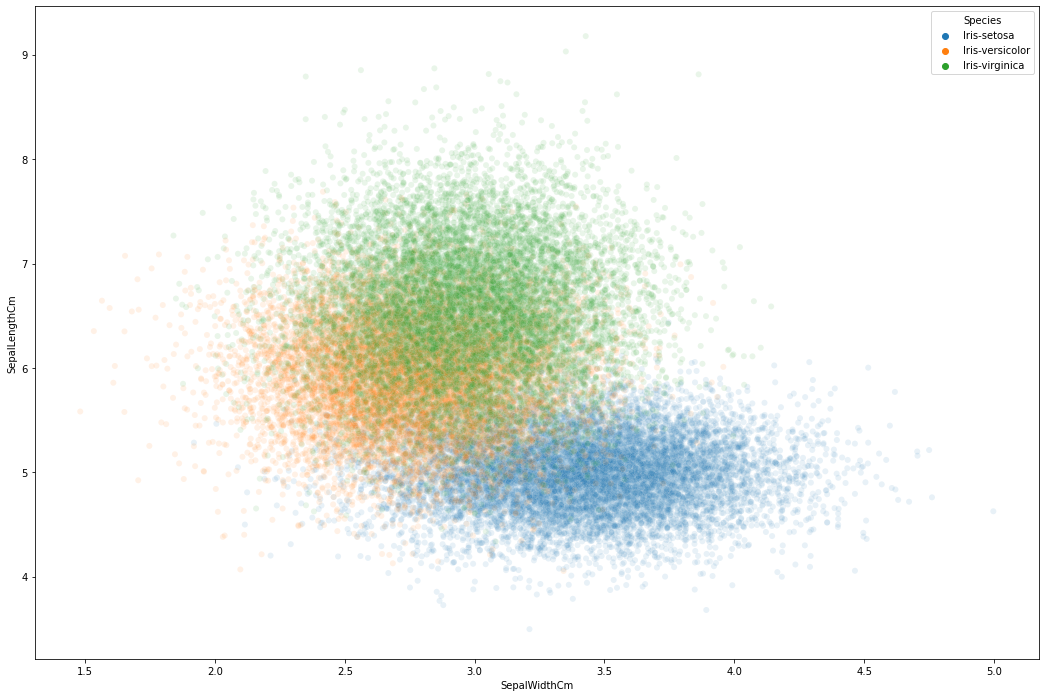

In [41]:
plt.figure(figsize=(18,12))
sns.scatterplot( data=df, y='SepalLengthCm', x='SepalWidthCm', hue='Species', alpha=0.1);

Man sieht, dass sich die Größen der Kelchblätter in allen Dimensionen stark überlappen. 

__Erbegnis:__ Die Größe der Kelchblätter ist nicht geeignet, die Arten zu unterscheiden.

### Unterscheidung anhand der Blütenblätter?

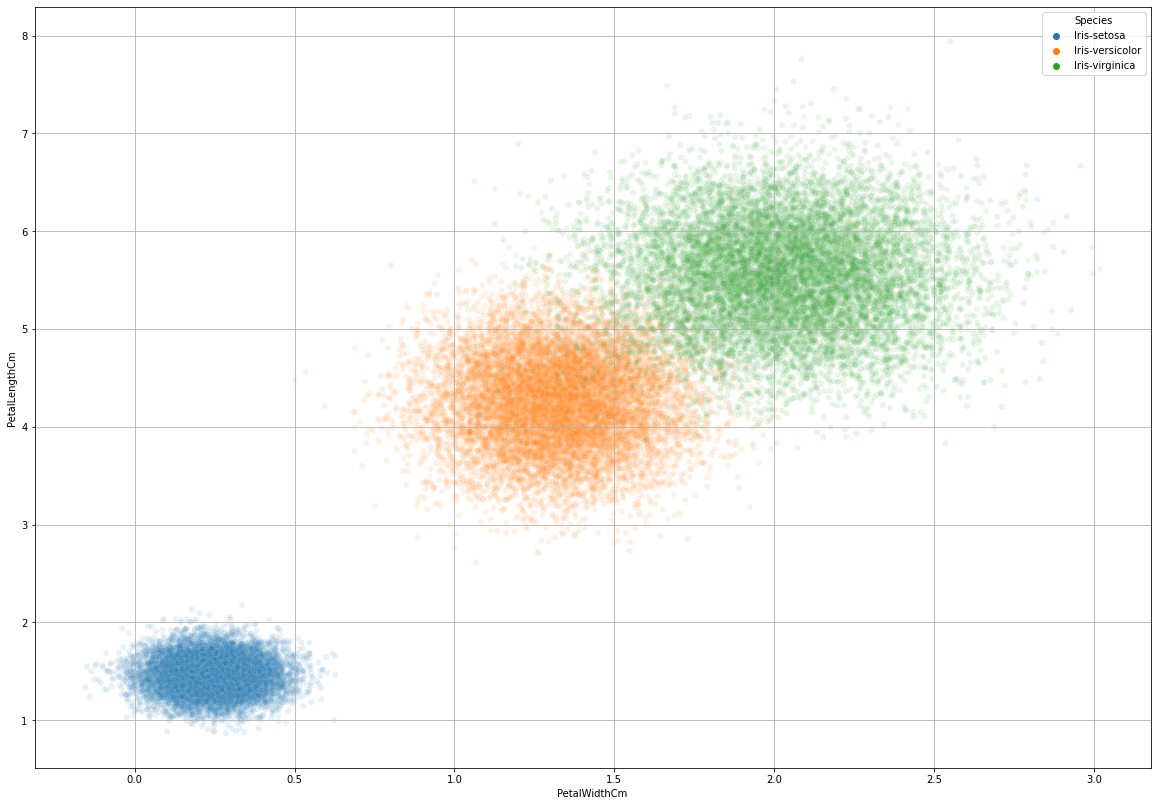

In [32]:
plt.figure(figsize=(20,14))
sns.scatterplot( data=df, y='PetalLengthCm', x='PetalWidthCm', hue='Species', alpha=0.1) 
plt.grid() # grid ist wichtig, wenn man den Plot als Bestimmungs.Werkzeug verwenden will
plt.show()

__Ergebnis:__ Länge und Breite der Blütenblätter sind ein gutes Merkmal zur Unterscheidung der Arten. 

__Fausregeln zur Unterscheidung der Sorten__ (alle Maße in mm):
* bei Länge < 25 und  Breite < 8 handelt es sich höchstwahrscheinlich um Iris-Setosa
* wenn Länge + 3*Breite < 100 handelt es sich wahrscheinlich um Iris-Versicolor
* andernfalls handelt es sich wahrscheinlich um Iris-Virginica

_Alternativ kann man die Spezies anhand der Maße der Blüten direkt aus dem Diagramm ablesen und erhält so gleich ein Gefühl für die Zuverlässigkeit der Bestimmung._  

## Korrelieren die Maße der Kelch- und Blütenblätter?

### Korrelation über alle Sorten hinweg

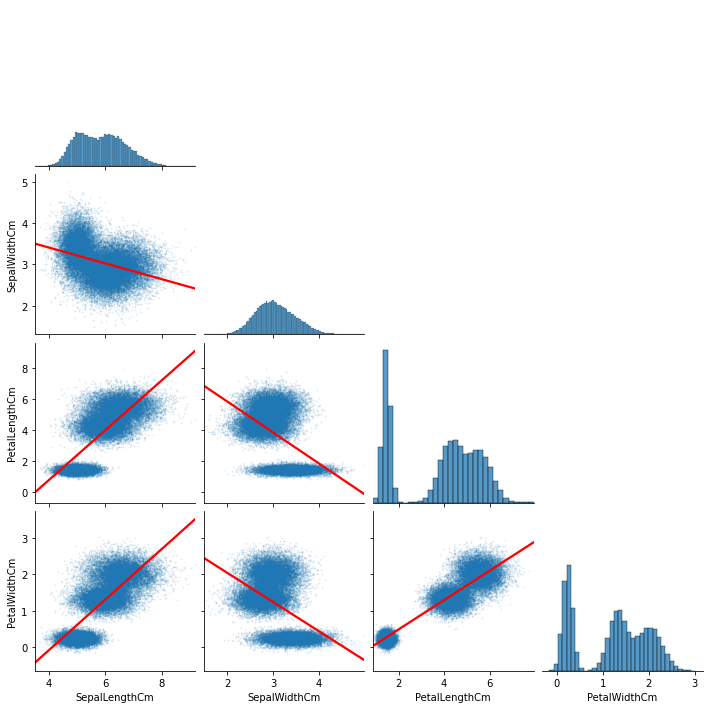

In [35]:
sns.pairplot(data=df, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1, 's':1}}, corner=True, 
             x_vars=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], 
             y_vars=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']);

__Zwischenergebnis:__ Es scheint Korrelationen zwischen den Maßen zu geben. Die Datenwolken sehen aber danach aus dass diese Korrelationen hauptsächlich durch die verschiedenen Sorten zustand kommen.




### Korrelation aufgeteilt nach Sorten

... dieselbe Analyse nochmal,  aufgeteilt nach Sorten.

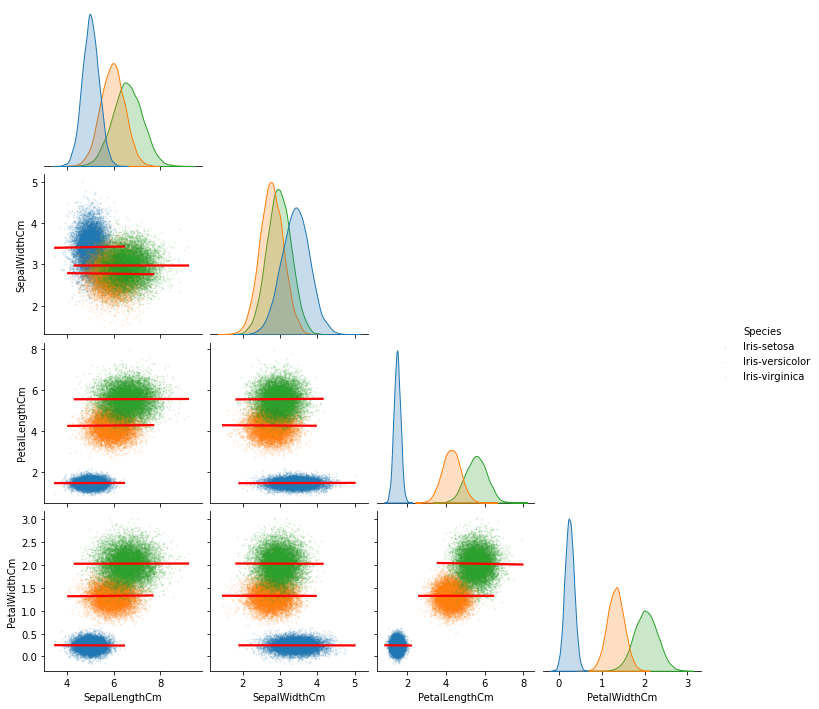

In [37]:
sns.pairplot(data=df, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1, 's':1}}, corner=True, hue='Species',
             x_vars=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], 
             y_vars=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']);

__Ergebnis:__ Innerhalb der Sorten ist keine Korrelation der Maße erkennbar






## Welche Sorten wurden wie häufig an welchem Ort verkauft?

Zugrunde liegen Verkaufzahlen für Mai 2020, die von Firma XYZ zur Verfügung gestellt wurden.
Die verkauften Pflanzen wurden anscheinend nicht nur nach der Spezies sondern sehr feinteilig nach ihren Maßen kategorisiert. Das erscheint zunächst ungewöhnlich.

In [23]:
pivot_sales = df.groupby(['Ort','Species']).sum()['Anzahl'].unstack()
pivot_sales


Species,Iris-setosa,Iris-versicolor,Iris-virginica
Ort,,,
Hamburg,167788,166659,172349
Köln,159494,176075,157197
Leipzig,167592,168419,166887
München,165719,169350,157590
Münster,167454,170506,171369
Rostock,163644,171531,172741
Trier,169915,158372,164077
Ulm,162176,158019,177541
Wolfsburg,172330,174757,156555


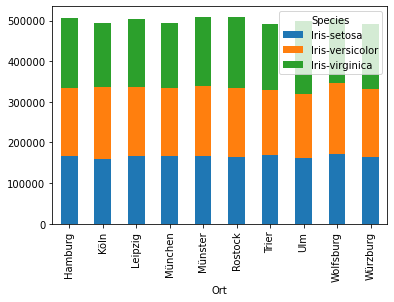

In [36]:
pivot_sales.plot(kind='bar', stacked=True);

__Ergebnis:__ Die Verkaufzahlen sind in etwa gleichverteilt, sowohl bezüglich der Orte als auch bezüglich der Arten. An jedem Ort etwa wurden ca. 500000 Pflanzen verkauft, davon entfielen auf jede Art etwa 1/3.

_Eine solche Verteilung ist unwahrscheinlich. Die Verkaufzahlen sind daher nicht sehr glaubwürdig. Da auch die Größenkategorisierung der verkauften Pflanzen ungewöhlich ist, liegt hier wahrscheinlich irgendwo ein Fehler vor._
